In [465]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Image

## В качестве распределения было выбрано экспоненциальное с параметром lambda=0.2


In [466]:
Lambda = 0.2 # параметр лямбда экспоненциального распределения
n_5=[5]*1000  # создаем список, для того, чтобы сформировать выборку заданнаго объёма, в данном случае n=5
n_10=[10]*1000
n_50=[50]*1000
inverse_sample_5=[] # создаем пустой список для будущей выборки
inverse_sample_10=[]
inverse_sample_50=[]

$$Y=(1/\alpha)*log(1 / (1 - X))$$ Формула обратного экспоненциального распределения для генерации выборки. X - равномерно распределенная случайная величина на отрезке (0,1).

## Создание выборки  для различных n.

In [467]:
z=[]
for j in n_5: #
    for x in  np.random.random(1000): # генерация 1000 равномерно распределенных случайных величин 
        z.append(1 / Lambda  * np.log(1 / (1 - x)))
    inverse_sample_5.append(random.sample(z,j)) # создание 1000 списков объёмом в 5 элементов каждый 

In [468]:
l=[]
for j in n_10:
    for x in  np.random.random(1000):
        l.append(1 / Lambda  * np.log(1 / (1 - x)))
    inverse_sample_10.append(random.sample(l,j))   

In [469]:
m=[]
for j in n_50:
    for x in  np.random.random(1000):
        m.append(1 / Lambda  * np.log(1 / (1 - x)))
    inverse_sample_50.append(random.sample(m,j))   

## Находим среднее для  подсписка каждого объёма.

In [470]:
for j in range(len(inverse_sample_5)):
      inverse_sample_5[j]=sum(inverse_sample_5[j])/5 
# Заменяем каждый подсписок объёма 5 на среднее значение данного подсписка.        

In [471]:
for j in range(len(inverse_sample_10)):
      inverse_sample_10[j]=sum(inverse_sample_10[j])/10

In [472]:
for j in range(len(inverse_sample_50)):
      inverse_sample_50[j]=sum(inverse_sample_50[j])/50

## Дисперсия для списка средних

In [473]:
dispersia_5=0
for i in range(len(inverse_sample_5)):
        dispersia_5+=(inverse_sample_5[i] - sum(inverse_sample_5)/1000)**2
    

In [474]:
dispersia_10=0  # расчитываем дисперсию средних
for i in range(len(inverse_sample_10)):
        dispersia_10+=(inverse_sample_10[i] - sum(inverse_sample_10)/1000)**2

In [475]:
dispersia_50=0
for i in range(len(inverse_sample_50)):
        dispersia_50+=(inverse_sample_50[i] - sum(inverse_sample_50)/1000)**2

## Находим математическое ожидание для списка из средних

In [476]:
mean_5=1/Lambda # среднее для выборки в 5

In [477]:
mean_10=1/Lambda # среднее для выборки в 10

In [478]:
mean_50=1/Lambda # среднее для выборки в 50


## Оценка ско для нормального распределения

In [489]:
sigma_normal_5=1/(Lambda)**2

In [480]:
sigma_normal_10=1/(Lambda)**2

In [481]:
sigma_normal_50=1/(Lambda)**2

## Перенормировка данных, используя Z score

In [482]:
for i in range(len(inverse_sample_5)):
    inverse_sample_5[i]= (inverse_sample_5[i]-mean_5)/sigma_normal_5

In [483]:
for i in range(len(inverse_sample_10)):
    inverse_sample_10[i]= (inverse_sample_10[i]-mean_10)/sigma_normal_10

In [484]:
for i in range(len(inverse_sample_50)):
    inverse_sample_50[i]= (inverse_sample_50[i]-mean_50)/sigma_normal_50

## Построение графиков

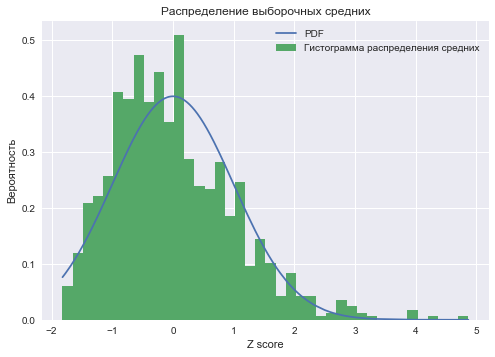

In [486]:

inverse_sample_5.sort()
pdf = stats.norm.pdf(inverse_sample_5, 0, 1)
plt.plot(inverse_sample_5, pdf)
plt.hist(inverse_sample_5, bins=40, normed=True)
plt.gca().legend(('PDF','Гистограмма распределения средних'))
plt.title('Распределение выборочных средних')
plt.xlabel('Z score')
plt.ylabel('Вероятность')
plt.show()

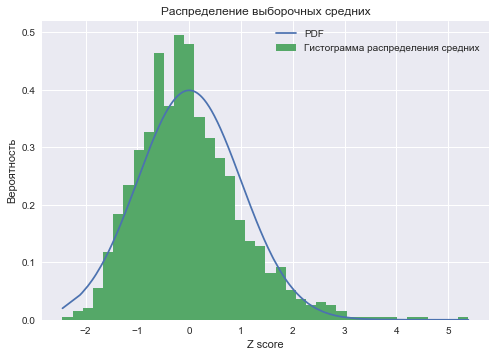

In [487]:

inverse_sample_10.sort()
pdf = stats.norm.pdf(inverse_sample_10,  0, 1)
plt.plot(inverse_sample_10, pdf)
plt.hist(inverse_sample_10, bins=40, normed=True, )
plt.gca().legend(('PDF','Гистограмма распределения средних'))
plt.title('Распределение выборочных средних')
plt.xlabel('Z score')
plt.ylabel('Вероятность')
plt.show()

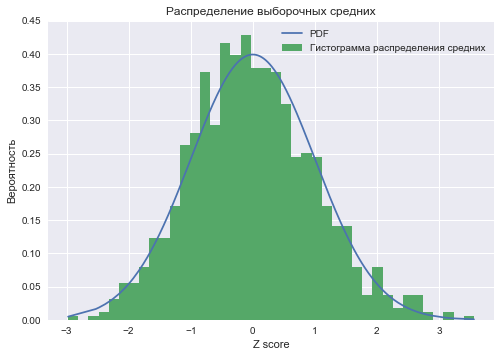

In [488]:
inverse_sample_50.sort()
pdf = stats.norm.pdf(inverse_sample_50, 0, 1)
plt.plot(inverse_sample_50, pdf)
plt.hist(inverse_sample_50, bins=40, normed=True)
plt.gca().legend(('PDF','Гистограмма распределения средних'))
plt.title('Распределение выборочных средних')
plt.xlabel('Z score')
plt.ylabel('Вероятность')
plt.show()

##### Вывод: с ростом объёма выборки распределение средних достаточно быстро стремится к нормальному. ЦПТ действительно работает.